<a href="https://colab.research.google.com/github/Udhay2898/Consumer-Behavior-and-Brand-Perception/blob/Master/Food_and_Beverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load three distinct datasets based on food and beverage sector survey results.

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/fact_survey_responses.csv')
df1.sample(3)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
3488,106489,123519,2-3 times a week,To stay awake during work/study,To combat fatigue,Yes,Neutral,Effective,No,3,...,More natural ingredients,Guarana,Yes,Yes,TV commercials,Innovative bottle design,No,100-150,Online retailers,Sports/exercise
5736,108737,125767,2-3 times a week,To stay awake during work/study,To combat fatigue,No,Neutral,Not sure,No,3,...,Other,Caffeine,Yes,No,Print media,Innovative bottle design,Yes,50-99,Supermarkets,Studying/working late
9826,112827,129857,2-3 times a week,Before exercise,Increased energy and focus,Yes,Positive,Healthy,No,3,...,Wider range of flavors,Sugar,Yes,Not Sure,Outdoor billboards,Innovative bottle design,No,100-150,Supermarkets,Other


In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_repondents.csv')
df2.sample(3)

,Respondent_ID,Name,Age,Gender,City_ID
1038,121069,Krish Singhal,15-18,Male,CT116
1726,121757,Sumer Chand,19-30,Female,CT114
5087,125118,Armaan Bhatti,46-65,Male,CT113


In [5]:
df3 = pd.read_csv('/content/drive/MyDrive/Data Sets/Analysis of Food and Beverage Industry Survey Data/dim_cities.csv')
df3.sample(3)

,City_ID,City,Tier
5,CT116,Hyderabad,Tier 1
9,CT120,Lucknow,Tier 2
4,CT115,Kolkata,Tier 2


Merge the dataframes into one dataframe.

In [6]:
merged_df = pd.merge(df2, df3, on='City_ID')

merged_df.sample(10)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
9721,123579,Anahi Banik,31-45,Non-binary,CT111,Delhi,Tier 1
3032,128999,Shalv Banerjee,19-30,Male,CT116,Hyderabad,Tier 1
7506,128738,Aayush Chakrabarti,19-30,Male,CT112,Mumbai,Tier 1
5321,127576,Samaira Barad,15-18,Female,CT113,Bangalore,Tier 1
1657,121605,Shayak Bali,19-30,Male,CT116,Hyderabad,Tier 1
2919,128388,Aayush Bawa,19-30,Male,CT116,Hyderabad,Tier 1
473,120188,Sumer Ray,46-65,Male,CT118,Pune,Tier 2
950,125237,Dharmajan Sarkar,19-30,Male,CT118,Pune,Tier 2
7778,120995,Mahika D?lia,19-30,Male,CT114,Chennai,Tier 1
4085,123209,Kismat Ramanathan,15-18,Female,CT113,Bangalore,Tier 1


In [7]:
df = pd.merge(merged_df,df1,on = 'Respondent_ID')

df.sample(1)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
7311,127414,Shalv Shanker,19-30,Male,CT112,Mumbai,Tier 1,110384,2-3 times a week,Before exercise,...,Reduced sugar content,Vitamins,No,No,Other,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise


Exploring Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Respondent_ID                   10000 non-null  int64 
 1   Name                            10000 non-null  object
 2   Age                             10000 non-null  object
 3   Gender                          10000 non-null  object
 4   City_ID                         10000 non-null  object
 5   City                            10000 non-null  object
 6   Tier                            10000 non-null  object
 7   Response_ID                     10000 non-null  int64 
 8   Consume_frequency               10000 non-null  object
 9   Consume_time                    10000 non-null  object
 10  Consume_reason                  10000 non-null  object
 11  Heard_before                    10000 non-null  object
 12  Brand_perception                10000 non-null 

In [9]:
df.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

REarange Columns Order

In [10]:
columns_order = [
    'Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
    'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
    'Heard_before', 'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
    'Current_brands', 'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
    'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
    'Interest_in_natural_or_organic', 'Marketing_channels', 'Packaging_preference',
    'Limited_edition_packaging', 'Price_range', 'Purchase_location', 'Typical_consumption_situations'
]

# Reordering the DataFrame columns
df = df[columns_order]

df.sample(5)

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
9194,123707,Jayesh Bhakta,19-30,Male,CT115,Kolkata,Tier 2,106677,2-3 times a week,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,Other,Eco-friendly design,Not Sure,50-99,Supermarkets,Studying/working late
4477,124667,Madhup Bahl,15-18,Male,CT113,Bangalore,Tier 1,107637,2-3 times a week,Before exercise,...,Wider range of flavors,Vitamins,No,Not Sure,TV commercials,Other,No,50-99,Supermarkets,Sports/exercise
7954,122791,Kabir Mani,31-45,Male,CT114,Chennai,Tier 1,105761,Daily,To stay awake during work/study,...,Wider range of flavors,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Gyms and fitness centers,Studying/working late
6748,123747,Divyansh Amble,19-30,Male,CT112,Mumbai,Tier 1,106717,2-3 times a week,Throughout the day,...,Reduced sugar content,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,Yes,100-150,Online retailers,Sports/exercise
3039,129057,Sana Sami,19-30,Male,CT116,Hyderabad,Tier 1,112027,Rarely,Before exercise,...,Reduced sugar content,Caffeine,Yes,Not Sure,Other,Compact and portable cans,Yes,Below 50,Online retailers,Studying/working late


In [11]:
df.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Brand_perception', 'General_perception',
       'Improvements_desired', 'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

**Drop the unwanted columns**

In [12]:
df = df.drop(columns=['Respondent_ID', 'City_ID', 'Response_ID'])

df.sample(2)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
739,Ahana Gola,15-18,Male,Pune,Tier 2,2-3 times a month,For mental alertness,Increased energy and focus,No,No,...,Healthier alternatives,Sugar,No,Not Sure,TV commercials,Other,Not Sure,100-150,Online retailers,Studying/working late
392,Nakul Bahri,31-45,Male,Ahmedabad,Tier 2,Daily,For mental alertness,Other,No,No,...,Healthier alternatives,Caffeine,Yes,Yes,Online ads,Compact and portable cans,No,100-150,Supermarkets,Sports/exercise


In [13]:
for column in df.columns:
  unique_value = df[column].unique()
  print(f"{column} :\n {unique_value}\n")

Name :
 ['Aniruddh Issac' 'Umang Sarkar' 'Kanav Thaman' ... 'Rhea Mani'
 'Rhea D?lia' 'Nirvi Golla']

Age :
 ['15-18' '31-45' '19-30' '65+' '46-65']

Gender :
 ['Female' 'Non-binary' 'Male']

City :
 ['Ahmedabad' 'Pune' 'Hyderabad' 'Bangalore' 'Lucknow' 'Mumbai' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi']

Tier :
 ['Tier 2' 'Tier 1']

Consume_frequency :
 ['2-3 times a week' 'Once a week' 'Daily' 'Rarely' '2-3 times a month']

Consume_time :
 ['To stay awake during work/study' 'Before exercise' 'Throughout the day'
 'For mental alertness']

Consume_reason :
 ['Increased energy and focus' 'To enhance sports performance'
 'To boost performance' 'Other' 'To combat fatigue']

Heard_before :
 ['Yes' 'No']

Tried_before :
 ['No' 'Yes']

Taste_experience :
 [5 3 2 4 1]

Reasons_preventing_trying :
 ['Unfamiliar with the brand' 'Not available locally'
 'Not interested in energy drinks' 'Health concerns' 'Other']

Current_brands :
 ['Blue Bull' 'Cola-Coka' 'Gangster' 'Others' 'Bepsi' 'CodeX' 'Sky 9'

In [14]:
df.nunique()

,0
Name,9487
Age,5
Gender,3
City,10
Tier,2
Consume_frequency,5
Consume_time,4
Consume_reason,5
Heard_before,2
Tried_before,2


In [15]:
df.describe()

,Taste_experience
count,10000.000000
mean,3.281900
std,1.239752
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [16]:
object_data = df.select_dtypes(include='object')
object_data.describe()

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9487,5,3,10,2,5,4,5,2,2,...,5,4,2,3,5,5,3,4,5,5
top,Hiran Banerjee,19-30,Male,Bangalore,Tier 1,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,No,...,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
freq,3,5520,6038,2828,7537,3491,3409,3574,5553,5119,...,2995,3896,6045,4983,4020,3984,4023,4288,4494,4494


In [17]:
df.duplicated().sum()

0

In [18]:
df.dtypes

,0
Name,object
Age,object
Gender,object
City,object
Tier,object
Consume_frequency,object
Consume_time,object
Consume_reason,object
Heard_before,object
Tried_before,object


In [19]:
df.sample(5)

,Name,Age,Gender,City,Tier,Consume_frequency,Consume_time,Consume_reason,Heard_before,Tried_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
9463,Vedika Chaudhry,19-30,Female,Kolkata,Tier 2,Daily,To stay awake during work/study,Other,No,Yes,...,More natural ingredients,Vitamins,No,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Online retailers,Studying/working late
865,Ela Reddy,15-18,Male,Pune,Tier 2,2-3 times a week,To stay awake during work/study,To combat fatigue,No,No,...,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Not Sure,Above 150,Online retailers,Sports/exercise
8325,Bhavin Gala,19-30,Male,Chennai,Tier 1,Rarely,To stay awake during work/study,Increased energy and focus,Yes,Yes,...,Healthier alternatives,Vitamins,No,Yes,Online ads,Compact and portable cans,No,Below 50,Supermarkets,Studying/working late
2424,Vihaan Saxena,19-30,Female,Hyderabad,Tier 1,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Yes,...,Other,Caffeine,No,Not Sure,Online ads,Innovative bottle design,Yes,50-99,Supermarkets,Social outings/parties
5298,Diya Buch,19-30,Female,Bangalore,Tier 1,2-3 times a week,To stay awake during work/study,To boost performance,No,Yes,...,Reduced sugar content,Caffeine,Yes,Not Sure,Other,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late


**Gender Distribution for Age Group**

In [20]:
age_df = df.pivot_table(index='Age', columns='Gender', aggfunc='size', fill_value=0)

age_df

Gender,Female,Male,Non-binary
Age,,,
15-18,516,903,69
19-30,1891,3337,292
31-45,834,1435,107
46-65,138,261,27
65+,76,102,12


**Rows (Index):** Represent different age groups (e.g., "15-18", "19-30", "31-45").

**Columns:** Represent different genders (e.g., "Female", "Male").

**Values:** Show the count of individuals for each age-gender combination. For example, the value at the intersection of "19-30" and "Female" is 2, indicating there are 2 females in the 19-30 age group.

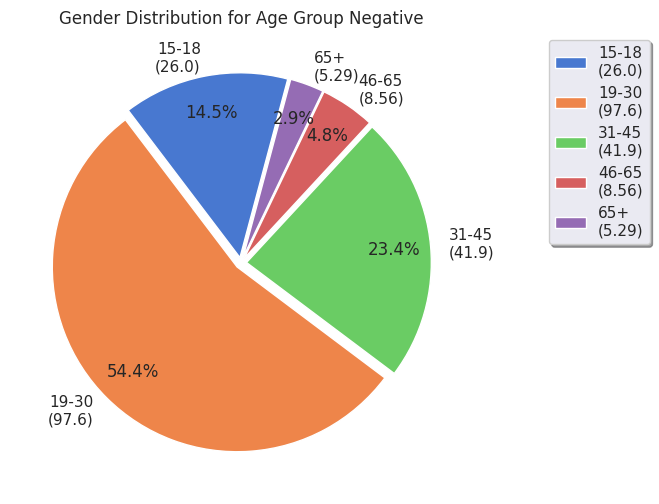

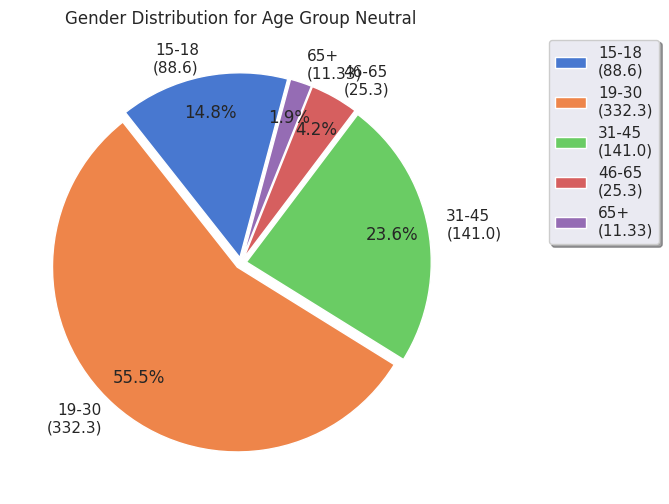

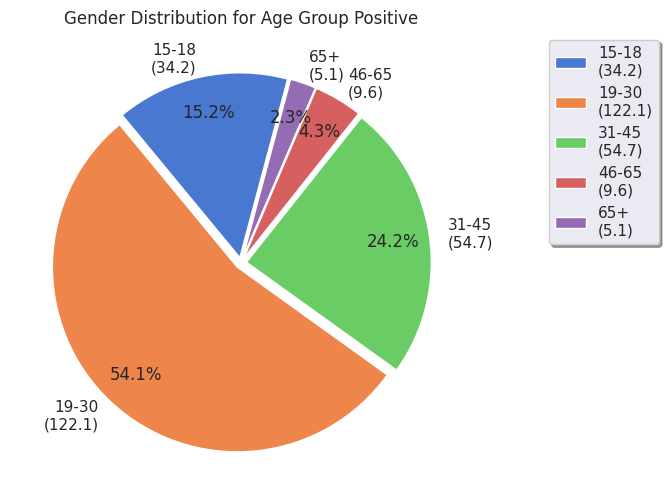

In [40]:
colors = sns.color_palette('muted',len(selected_age_group.values))
for age_group in age_df.columns:
    # Extract data for the current age group
    selected_age_group = age_df[age_group]

    # Extracting the counts (values) and labels (genders) for the pie chart
    pie_values = selected_age_group.values
    pie_labels = selected_age_group.index

    # Labels with counts
    labels_with_counts = [f'{label}\n({count})' for label, count in zip(pie_labels, pie_values)]

    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(pie_values, labels=labels_with_counts, autopct='%1.1f%%', startangle=75,
            explode=[0.03] * len(pie_values), pctdistance=0.8,colors = colors)

    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
    plt.title(f'Gender Distribution for Age Group {age_group}')

    plt.show()


The pie chart reveals the gender distribution across various age groups, showing significant patterns.

The 19-30 age group has the highest number of participants, with a substantial male majority.

The 15-18 age group also has a notable male majority, while the 31-45 age group maintains a similar pattern with a lower overall count.

The presence of non-binary individuals is consistently observed across all age groups, though in smaller numbers.

This distribution provides valuable insights into the demographic composition for targeted analysis.

**City-wise Consumption Frequency Analysis and Distribution**

In [22]:
city_count = df['City'].value_counts()

city_count

,count
City,
Bangalore,2828
Hyderabad,1833
Mumbai,1510
Chennai,937
Pune,906
Kolkata,566
Ahmedabad,456
Delhi,429
Jaipur,360


In [23]:
city_df = df.pivot_table(index='City', columns='Consume_frequency', aggfunc='size', fill_value=0)

city_df.head(10)

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
City,,,,,
Ahmedabad,36,91,26,131,172
Bangalore,562,1432,302,272,260
Chennai,211,90,378,87,171
Delhi,84,62,163,42,78
Hyderabad,86,392,95,527,733
Jaipur,64,73,91,89,43
Kolkata,32,100,32,177,225
Lucknow,39,30,34,51,21
Mumbai,313,767,143,140,147


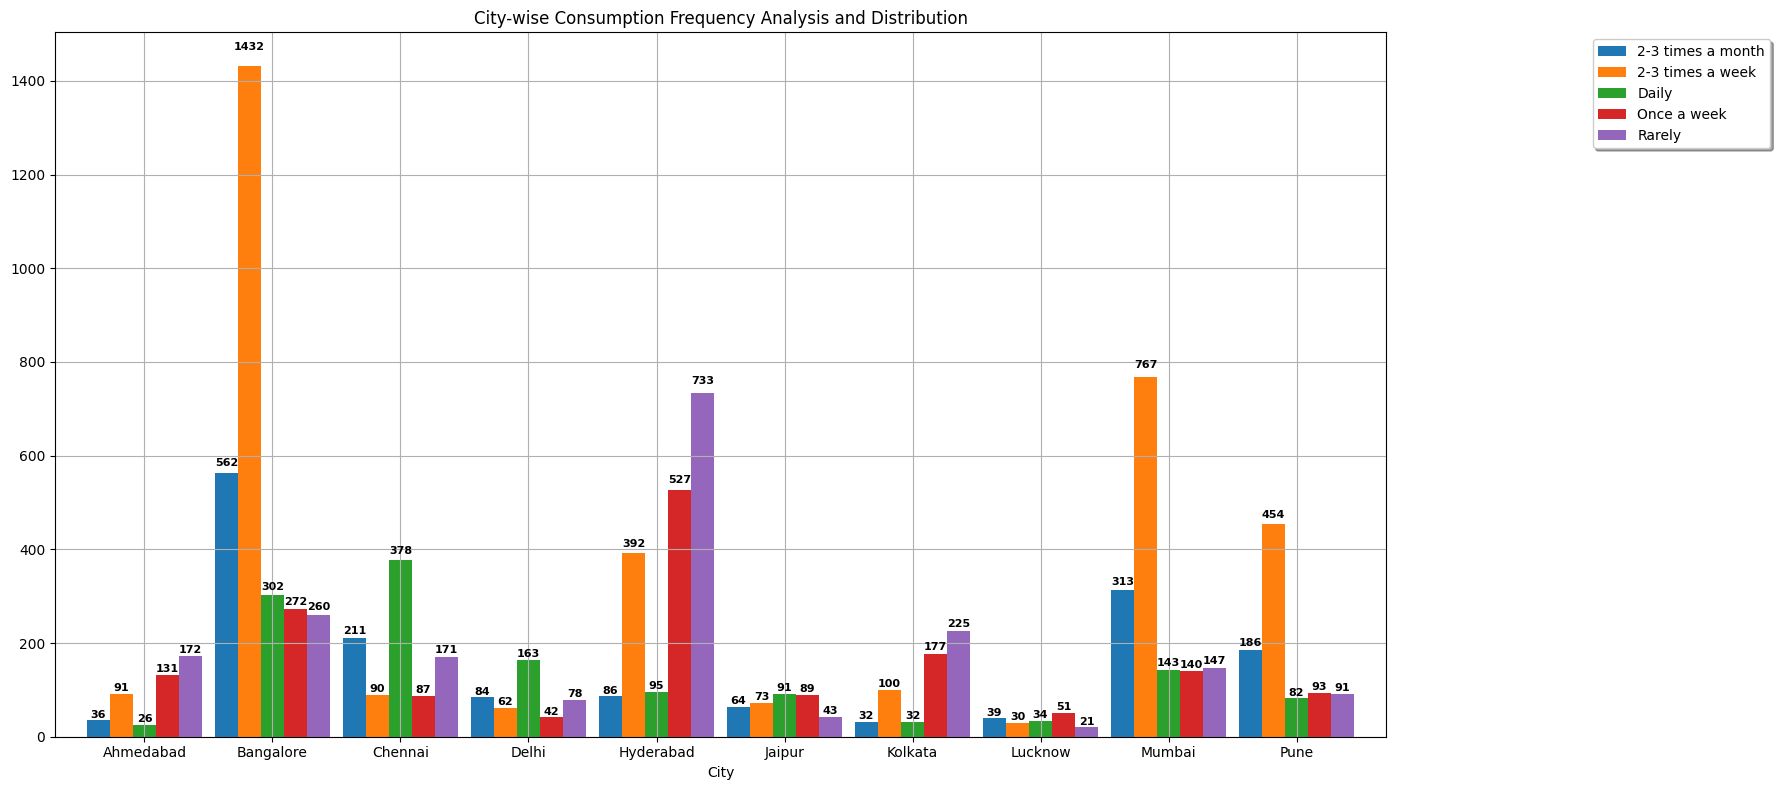

In [24]:
bar_width = 0.9

ax = city_df.plot.bar(figsize=(18, 8), grid=True, width=bar_width)

tick = range(len(city_df))
plt.xticks(ticks=tick, labels=city_df.index, rotation=0)
plt.title('City-wise Consumption Frequency Analysis and Distribution')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{int(height)}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                         # Font size
            fontweight='bold'                   # Make text bold
        )

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

The data provides a detailed analysis of consumption frequency across various cities.

Bangalore exhibits the highest frequency of daily and weekly consumption, indicating a strong consumer engagement with the product.

Hyderabad also shows significant weekly consumption, especially once a week and rarely, suggesting varied usage patterns.

Cities like Kolkata and Mumbai have a balanced distribution across different

consumption frequencies, while cities such as Ahmedabad and Jaipur show a higher tendency towards less frequent consumption.

This information highlights regional differences in consumer behavior and can guide targeted marketing strategies.

**City Distribution for Consumption Frequency**

**Loop Through Frequencies:** Below code iterates over each consumption frequency category in the city_df DataFrame (e.g., '2-3 times a month', 'Daily', etc.)

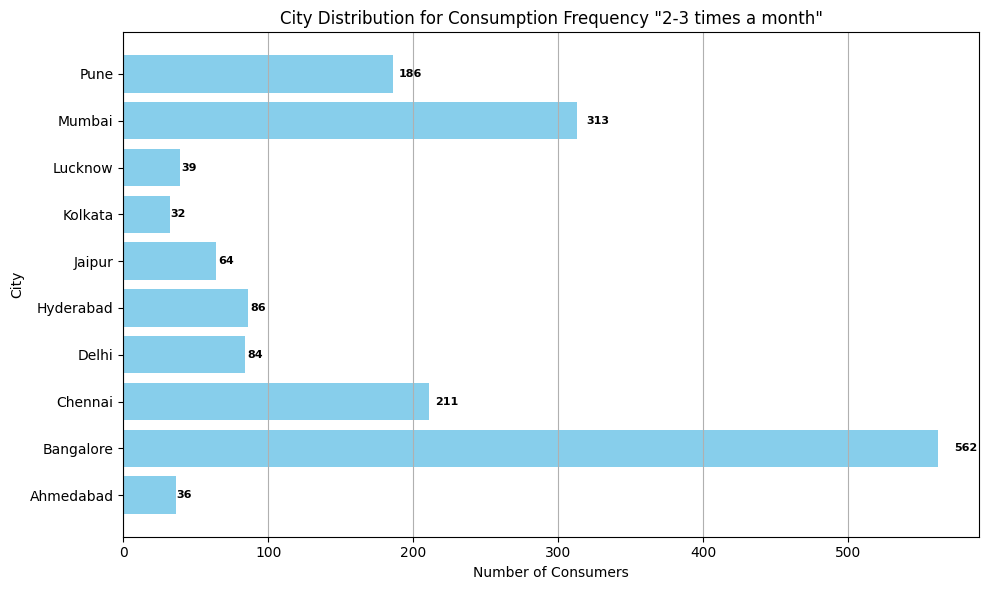

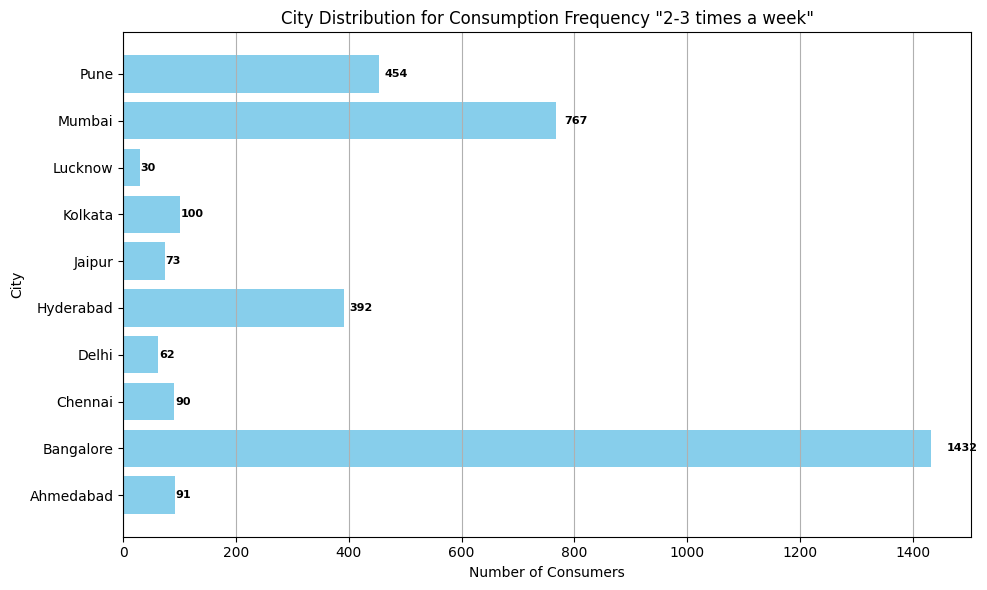

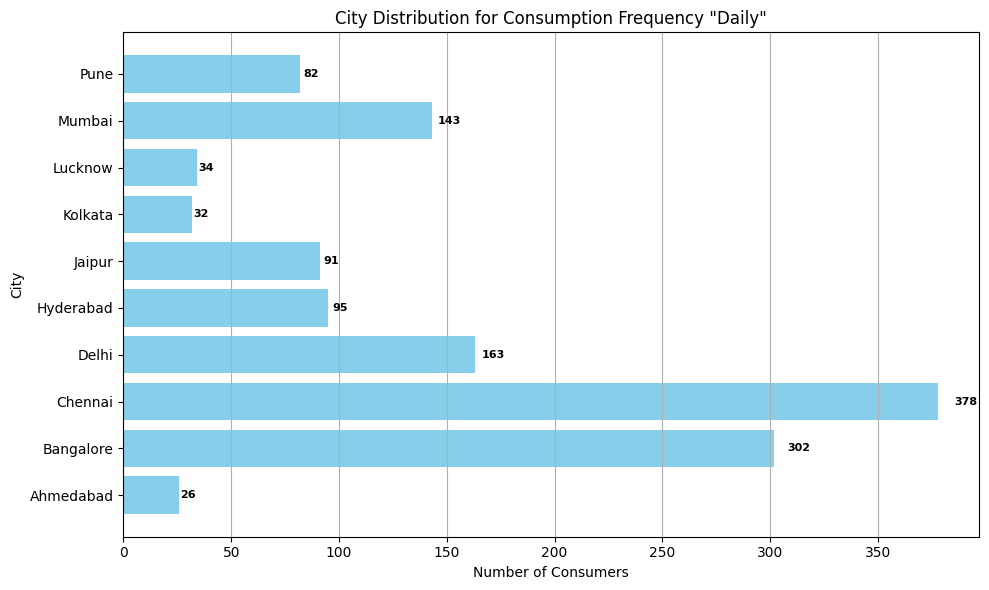

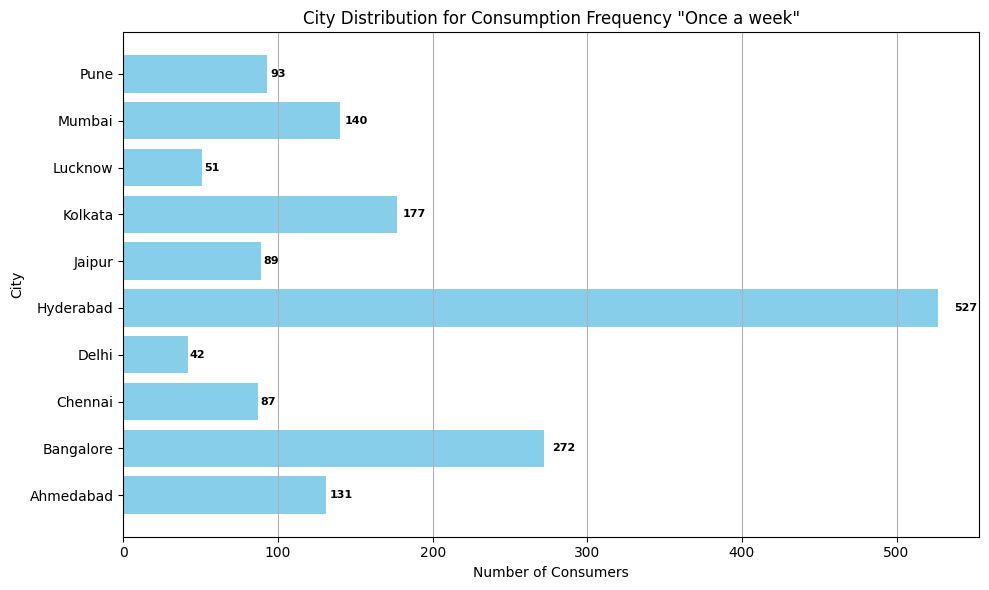

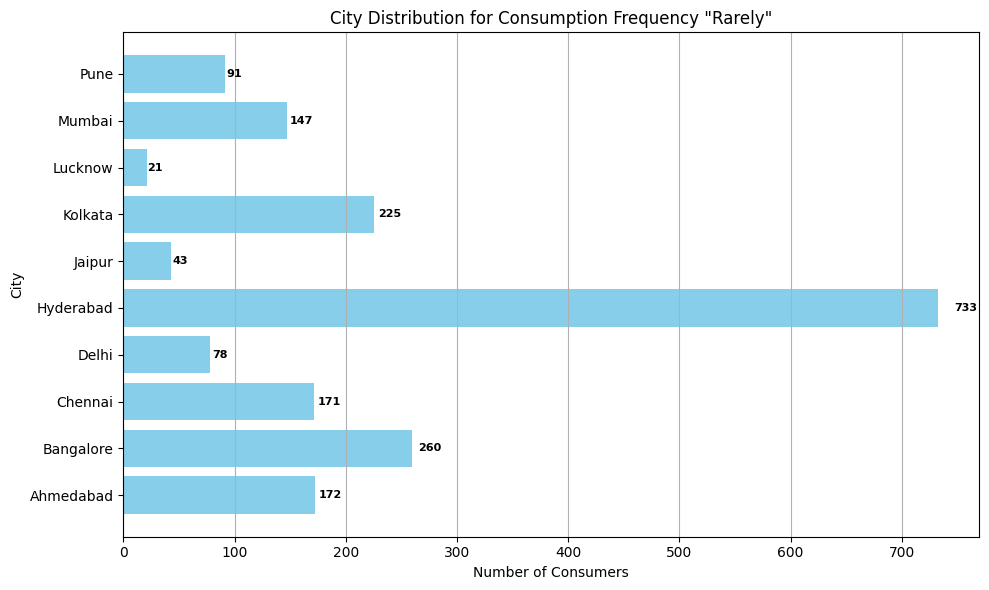

In [25]:
for frequency in city_df.columns:
    selected_frequency = city_df[frequency]

    bar_values = selected_frequency.values
    bar_labels = selected_frequency.index

    plt.figure(figsize=(10, 6))
    bars = plt.barh(bar_labels, bar_values, color='skyblue')

    for bar in bars:
        width = bar.get_width()                  # Get the width (value) of each bar
        label = f'{int(width)}'                  # Convert width to an integer string for labeling
        plt.text(
            width + 0.02 * width,                # X position (slightly to the right of the bar)
            bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
            label,                               # Label text
            ha='left',                           # Horizontal alignment
            va='center',                         # Vertical alignment
            fontsize=8,                          # Font size
            fontweight='bold'                    # Make text bold
        )

    plt.xlabel('Number of Consumers')
    plt.ylabel('City')
    plt.title(f'City Distribution for Consumption Frequency "{frequency}"')
    plt.grid(axis='x')

    plt.tight_layout()
    plt.show()


**Consumer Distribution bbased on TIER :**

**Tier 1 Cities:**

Bangalore leads the Tier 1 category with the highest value of 2,828, indicating a strong consumer presence or activity.

Hyderabad follows with 1,833, and Mumbai with 1,510.

Other significant Tier 1 cities include Chennai (937) and Delhi (429).

No data is present for Ahmedabad, Jaipur, Kolkata, Lucknow, and Pune under Tier 1, indicating that these cities belong to Tier 2.

**Tier 2 Cities:**

Ahmedabad has the highest value in Tier 2 with 456, followed by Pune (906) and Kolkata (566).

Other notable Tier 2 cities include Jaipur (360) and Lucknow (175).

There is no presence or recorded value for Tier 2 in Bangalore, Chennai, Delhi,
Hyderabad, and Mumbai, suggesting that these cities are classified solely as Tier 1.

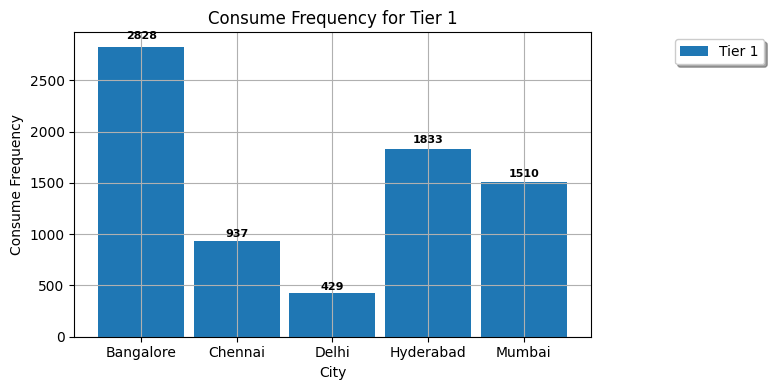

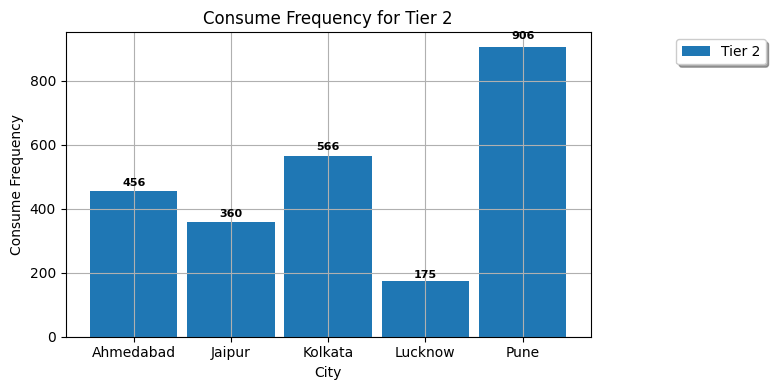

In [26]:
bar_width = 0.9

tier_df = df.groupby(['City', 'Tier']).agg({'Consume_frequency': 'count'}).reset_index()
tier_df = tier_df.pivot_table(index='City', columns='Tier', values='Consume_frequency', fill_value=0)

for tier in tier_df.columns:

    filter_df = tier_df[tier_df[tier] != 0]

    ax = filter_df[tier].plot.bar(figsize=(8,4),grid=True,width = bar_width,title=f"Consume Frequency for {tier}")

    plt.ylabel('Consume Frequency')
    plt.xlabel('City')

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            label = f'{int(height)}'
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
                height + 0.02 * height,             # Y position (slightly above the bar)
                label,                              # Label text
                ha='center',                        # Horizontal alignment
                va='bottom',                        # Vertical alignment
                fontsize=8,                         # Font size
                fontweight='bold'                   # Make text bold
            )

    tick = range(len(filter_df))
    plt.xticks(ticks = tick, labels = filter_df.index, rotation = 0)

    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

**Consumer Distribution:**
The data indicates a clear division of consumer presence between Tier 1 and Tier 2 cities.

Major metropolitan areas like Bangalore, Hyderabad, and Mumbai dominate. **Tier 1**, showcasing a higher concentration of consumers or activities in these regions.

**Tier 2 Cities:** Cities like Pune, Kolkata, and Ahmedabad are significant players in Tier 2, with consumer numbers that could indicate emerging markets or growing consumer bases in these areas.

**No Overlap:** There is no overlap between the tiers for any city, meaning each city is exclusively categorized as either Tier 1 or Tier 2. This clear distinction highlights different market dynamics and consumer behavior across these tiers.










**Gender Distribution by Consumption Reason**

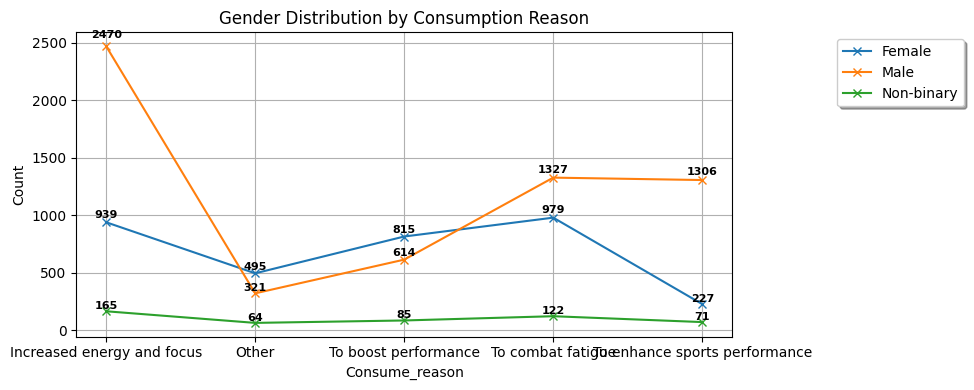

In [27]:
gender_df = df.groupby(['Gender','Consume_reason']).agg({'Name' : 'count'}).reset_index()

gender_df = gender_df.pivot_table(index = 'Consume_reason',columns = 'Gender',values = 'Name',fill_value = 0)

ax = gender_df.plot.line(figsize = (10,4),marker = 'x',grid = True)

for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    for x, y in zip(x_data, y_data):
        ax.text(
            x,                                   # X position
            y + 0.02 * y,                        # Y position (slightly above the point)
            f'{int(y)}',                         # Label text
            ha='center',                         # Horizontal alignment
            va='bottom',                         # Vertical alignment
            fontsize=8,                          # Font size
            fontweight='bold'                    # Make text bold
        )

tick = range(len(gender_df))
plt.xticks(ticks = tick, labels = gender_df.index, rotation = 0)

plt.xlabel('Consume_reason')
plt.ylabel('Count')
plt.title('Gender Distribution by Consumption Reason')

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

**Increased Energy and Focus:**

Males: 2,470
Females: 939
Non-binary: 165
This is the most common reason across all genders, particularly among males.

**Combatting Fatigue:**

Males: 1,327
Females: 979
Non-binary: 122
Both males and females commonly use energy drinks to fight fatigue, with males leading.

**Boosting Performance:**

Females: 815
Males: 614
Non-binary: 85
Females slightly outnumber males in using energy drinks for performance enhancement.

Enhancing Sports Performance:

Males: 1,306
Females: 227
Non-binary: 71
This reason is predominantly male-driven, reflecting higher male participation in sports.

**Other Reasons:**

Females: 495
Males: 321
Non-binary: 64
Females have a broader range of motivations for consuming energy drinks beyond the listed reasons.

The data provides insights into the reasons behind energy drink consumption, segmented by gender (Female, Male, Non-binary).

Overall, the data indicates that males are the predominant consumers of energy drinks across all the listed reasons, particularly for enhancing focus, combating fatigue, and boosting sports performance.

Females and non-binary individuals also participate in energy drink consumption but at lower rates, with varying motivations.

**Brand Perception by City and Age**

In [28]:
age_df = df.groupby(['City','Age','Brand_perception']).agg({'Name' : 'count'}).reset_index()

age_df = age_df.pivot_table(index = ['Age'],columns = ['Brand_perception'],values = 'Name',fill_value = 0).round(2)

age_df

Brand_perception,Negative,Neutral,Positive
Age,,,
15-18,26.00,88.60,34.2
19-30,97.60,332.30,122.1
31-45,41.90,141.00,54.7
46-65,8.56,25.30,9.6
65+,5.29,11.33,5.1


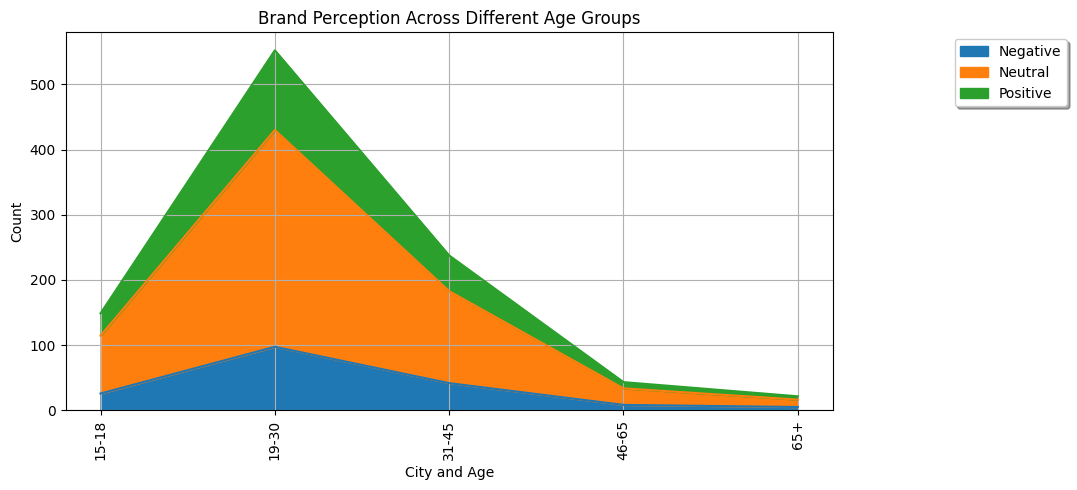

In [29]:
age_df.plot.area(figsize=(11, 5), grid=True)

tick = range(len(age_df))
plt.xticks(ticks = tick, labels = age_df.index, rotation = 90)

plt.xlabel('City and Age')
plt.ylabel('Count')
plt.title('Brand Perception Across Different Age Groups')

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Brand Perception Across Different Age Groups :**

**Youthful Enthusiasm (15-18 years):**

Negative Perception: 26.00
Neutral Perception: 88.60
Positive Perception: 34.20
This age group shows a higher neutral perception, with a notable positive attitude towards brands.

**Young Adults (19-30 years):**

Negative Perception: 97.60
Neutral Perception: 332.30
Positive Perception: 122.10
Young adults are the most engaged, with a strong neutral perception and a significant positive perception.

**Middle-Aged (31-45 years):**

Negative Perception: 41.90
Neutral Perception: 141.00
Positive Perception: 54.70
This group leans towards a neutral brand perception, with a fair amount of positive feedback.

**Mature Consumers (46-65 years):**

Negative Perception: 8.56
Neutral Perception: 25.30
Positive Perception: 9.60
Older consumers are less engaged, showing lower overall perception scores with a neutral tendency.

**Senior Citizens (65+ years):**

Negative Perception: 5.29
Neutral Perception: 11.30
Positive Perception: 4.00
The senior age group has the lowest interaction with brands, maintaining a predominantly neutral stance.

Overall, the data indicates that brand perception varies significantly with age.

Young adults (19-30 years) are the most responsive to brands, exhibiting the highest positive and neutral perceptions.

In contrast, senior citizens (65+ years) show the least interaction, with a majority holding a neutral view towards brands. The general trend suggests that as age increases, brand perception becomes less polarized, leaning towards neutrality.

**Desired Improvements in Energy Drink Preferences by Gender and Age**

In [30]:
gen_age_df = df.groupby(['Gender','Age','Improvements_desired']).agg({'Name' : 'count'}).reset_index()

gen_age_df = gen_age_df.pivot_table(index=['Gender', 'Age'], columns='Improvements_desired', values='Name', fill_value=0)

gen_age_df

Improvements_desired  Healthier alternatives  More natural ingredients  Other  \
Gender     Age                                                                  
Female     15-18                        79.0                     138.0   49.0   
           19-30                       271.0                     473.0  194.0   
           31-45                       125.0                     182.0   92.0   
           46-65                        17.0                      36.0   11.0   
           65+                           5.0                      24.0    7.0   
Male       15-18                       126.0                     242.0   69.0   
           19-30                       511.0                     848.0  336.0   
           31-45                       196.0                     341.0  156.0   
           46-65                        43.0                      63.0   22.0   
           65+                          17.0                      27.0   13.0   
Non-binary 15-18                         7.0                      23.0    4.0   
           19-30                        43.0                      74.0   28.0   
           31-45                        25.0                      17.0   13.0   
           46-65                         4.0                       7.0    2.0   
           65+                           3.0                       3.0    2.0   

Improvements_desired  Reduced sugar content  Wider range of flavors  
Gender     Age                                                       
Female     15-18                      152.0                    98.0  
           19-30                      550.0                   403.0  
           31-45                      256.0                   179.0  
           46-65                       39.0                    35.0  
           65+                         24.0                    16.0  
Male       15-18                      281.0                   185.0  
           19-30                      977.0                   665.0  
           31-45                      448.0                   294.0  
           46-65                       84.0                    49.0  
           65+                         31.0                    14.0  
Non-binary 15-18                       25.0                    10.0  
           19-30                       93.0                    54.0  
           31-45                       24.0                    28.0  
           46-65                        9.0                     5.0  
           65+                          2.0                     2.0

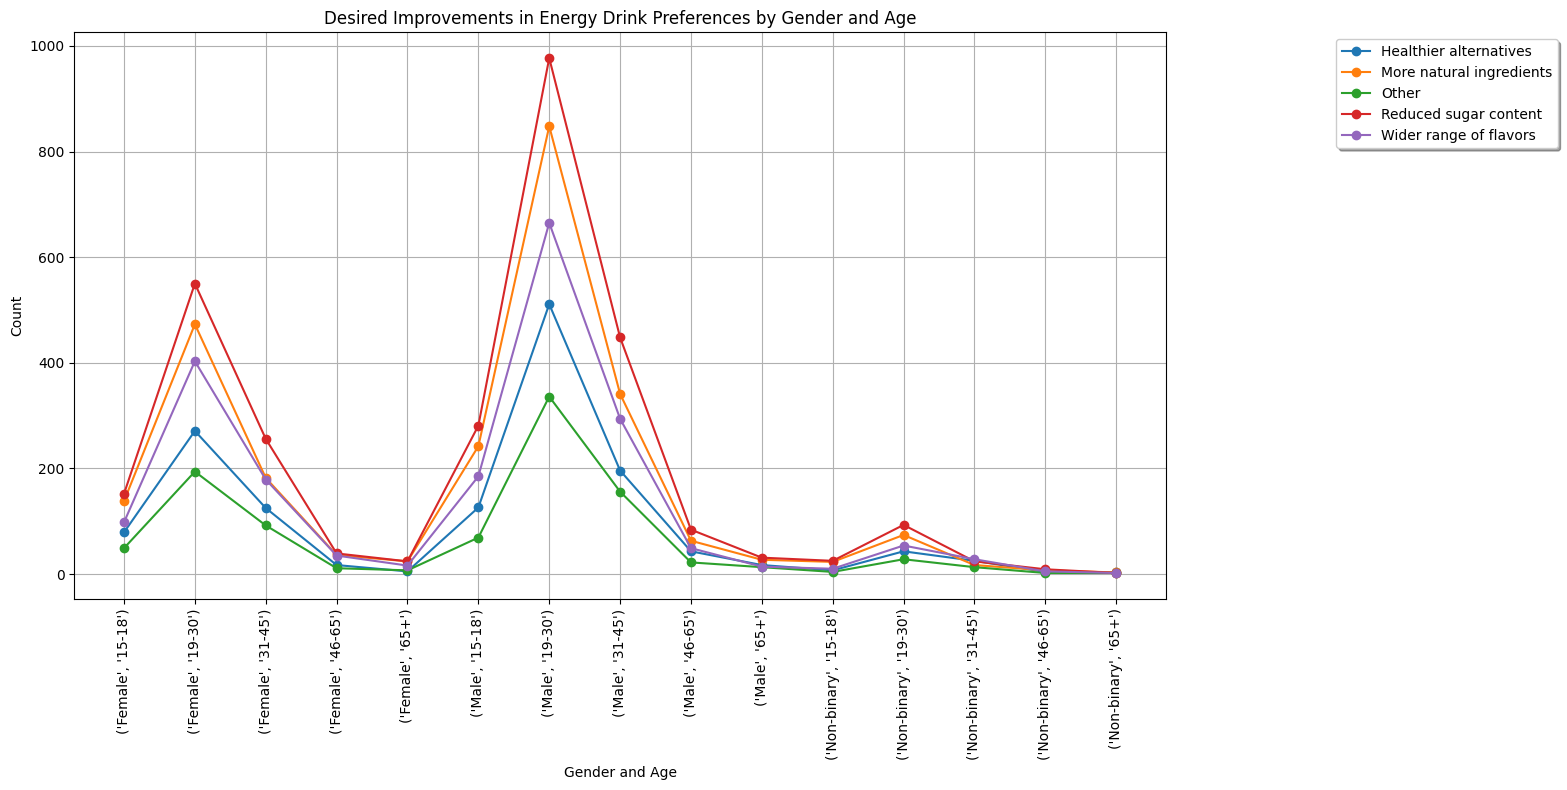

In [31]:
ax = gen_age_df.plot.line(figsize=(16, 8), marker='o', grid=True)

plt.xlabel('Gender and Age')
plt.ylabel('Count')

plt.title('Desired Improvements in Energy Drink Preferences by Gender and Age')

tick = range(len(gen_age_df))
plt.xticks(ticks=tick, labels = gen_age_df.index, rotation = 90)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

The data highlights distinct preferences for improvements in energy drinks across genders and age groups.

Young Adults (19-30 years), regardless of gender, prioritize reduced sugar content and more natural ingredients.

Females show a preference for healthier alternatives and wider range of flavors, while males focus more on reduced sugar content.

Non-binary individuals show lower overall numbers but prefer reduced sugar content and more natural ingredients.

Older age groups (46-65 years and 65+) generally have lower preferences for improvements, with a notable focus on healthier alternatives and reduced sugar content.

**Overall Summary:**

**Data Overview:**

The dataset comprises 10,000 entries with various attributes, including demographic details, consumption patterns, brand perceptions, and marketing channels.

Key columns include Name, Age, Gender, City, Tier, and multiple attributes related to consumption and perceptions.

**Trends Identified:**

**Age Distribution:** The most common age group is 19-30, accounting for 55.2% of the data. This group shows a strong preference for consumption patterns like "2-3 times a week."

**Gender Distribution:** The majority of the dataset consists of males (60.38%), followed by females (27.12%) and non-binary individuals (12.5%).

**City Distribution:** Bangalore is the most frequently listed city (28.28%), with high representation across various attributes.

**Consumption Frequency:** The most common consumption frequency is "2-3 times a week," indicating regular use.

**Brand Perception:** The prevalent brand perception is "Neutral," though "Effective" and "Reduced sugar content" are notable improvements desired.

**Marketing Channels:** Online ads are the most frequently mentioned marketing channel (60.45%).

**Trends:**

**High Representation of Specific Groups:**

The dataset shows a strong concentration of entries from specific age groups (19-30) and cities (Bangalore). This suggests a targeted demographic and geographic focus.

**Brand Preferences and Perceptions:**

Brands are often perceived neutrally, with an emphasis on effectiveness and reduced sugar content as desired improvements.

This indicates an opportunity to enhance brand differentiation and address consumer concerns.

**Marketing Effectiveness:**

Online ads are the most common marketing channel, suggesting its effectiveness or preference among the audience.

**Suggestions for Improvement:**

**Diversify Demographic and Geographic Representation:**

Expand marketing and outreach efforts to include more diverse age groups and cities to capture a broader audience.

Consider targeted campaigns to balance representation.

**Enhance Brand Perception:**

Address the common desire for reduced sugar content and improve brand effectiveness to shift more responses toward positive perceptions.

Implement strategies for better product positioning and communicate benefits clearly.

**Optimize Marketing Channels:**

While online ads are effective, explore other marketing channels (e.g., social media, influencer partnerships) to reach untapped segments and enhance overall marketing strategy.

**Improve Product Offering:**

Based on the feedback regarding "Not available locally" and other reasons for preventing trying, ensure product availability and explore regional distribution strategies to reduce barriers to purchase.

**Leverage Feedback:**

Use consumer feedback on "Reasons for Choosing Brands" and "Improvements Desired" to tailor product offerings and marketing messages.

This will help in aligning products with consumer expectations and preferences.


By addressing these areas, you can enhance consumer satisfaction, broaden market reach, and improve overall brand performance.